# Employee

## Bối cảnh

Trong thời đại hiện đại, lực lượng lao động có xu hướng thay đổi công việc thường xuyên hơn, đặt ra thách thức lớn đối với các doanh nghiệp trong việc giữ chân nhân viên giỏi. Tình trạng nghỉ việc không mong muốn gây ảnh hưởng đến chi phí, hiệu suất và cả văn hóa nội bộ của công ty.

Với sự phát triển của khoa học dữ liệu và học máy, doanh nghiệp có thể tận dụng dữ liệu nhân sự sẵn có để phân tích hành vi, nhận diện xu hướng nghỉ việc, từ đó chủ động đưa ra giải pháp phù hợp.

## Vấn đề đặt ra

Tình trạng nhân viên nghỉ việc có thể gây ra nhiều hệ lụy:

    - Chi phí tuyển dụng và đào tạo người mới tăng cao
    - Gián đoạn quy trình làm việc và hiệu suất đội nhóm
    - Mất kiến thức nội bộ và ảnh hưởng đến tinh thần nhân viên còn lại

Tuy nhiên, không phải lúc nào lý do nghỉ việc cũng dễ dàng quan sát được. Việc dựa vào cảm tính hay đánh giá thủ công không đủ chính xác và khó mở rộng.

## Mục tiêu

Sử dụng dữ liệu nhân sự để phân tích và dự đoán khả năng nghỉ việc của nhân viên, cụ thể các yếu tố ảnh hưởng đến quyết định nghỉ việc:

    - Tuổi, giới tính, kinh nghiệm, trình độ học vấn, thành phố làm việc, bậc lương,...

    - Xây dựng mô hình dự đoán khả năng nghỉ việc

Đề xuất giải pháp chiến lược giúp doanh nghiệp giữ chân nhân viên, dựa trên dữ liệu phân tích


## Tổng quan và xử lí dữ liệu

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Employee.csv')
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [ ]:
data = df.copy()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [ ]:
data.describe(include = 'all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
count,4653,4653.000000,4653,4653.000000,4653.000000,4653,4653,4653.000000,4653.000000
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN
freq,3601,NaN,2228,NaN,NaN,2778,4175,NaN,NaN
mean,NaN,2015.062970,NaN,2.698259,29.393295,NaN,NaN,2.905652,0.343864
std,NaN,1.863377,NaN,0.561435,4.826087,NaN,NaN,1.558240,0.475047
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,0.000000
25%,NaN,2013.000000,NaN,3.000000,26.000000,NaN,NaN,2.000000,0.000000
50%,NaN,2015.000000,NaN,3.000000,28.000000,NaN,NaN,3.000000,0.000000
75%,NaN,2017.000000,NaN,3.000000,32.000000,NaN,NaN,4.000000,1.000000


| Cột dữ liệu                      | Mô tả                                                                      |
| -------------------------------- | -------------------------------------------------------------------------- |
| **Education**                    | Trình độ học vấn, bao gồm bằng cấp, ngành học và cơ sở đào tạo.            |
| **Joining Year**                 | Năm gia nhập công ty – dùng để tính thời gian làm việc.                    |
| **City**                         | Thành phố nơi nhân viên đang sống hoặc làm việc.                           |
| **Payment Tier**                 | Bậc thanh toán – phân loại mức lương của nhân viên theo cấp bậc.           |
| **Age**                          | Tuổi của nhân viên – cung cấp thông tin nhân khẩu học.                     |
| **Gender**                       | Giới tính – phục vụ phân tích về tính đa dạng trong tổ chức.               |
| **Ever Benched**                 | Nhân viên từng bị "benched" (không được phân công công việc) hay chưa.     |
| **Experience in Current Domain** | Số năm kinh nghiệm trong lĩnh vực hiện tại của nhân viên.                  |
| **Leave or Not**                 | Cho biết nhân viên có rời công ty hay không. |


In [ ]:
data.isna().sum()

,0
Education,0
JoiningYear,0
City,0
PaymentTier,0
Age,0
Gender,0
EverBenched,0
ExperienceInCurrentDomain,0
LeaveOrNot,0


In [ ]:
data.duplicated().sum()

np.int64(1889)

In [ ]:
# vẽ phân bố của biến LeaveOrNot
data['LeaveOrNot'].value_counts()

,count
LeaveOrNot,
0,3053
1,1600


In [ ]:
df['LeaveOrNot'].value_counts(normalize=True)

,proportion
LeaveOrNot,
0,0.656136
1,0.343864


Nhận xét: Có mất cân bằng – nhưng ở mức trung bình

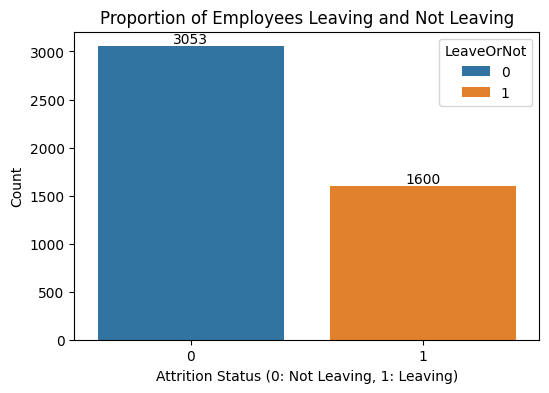

In [ ]:
plt.figure(figsize=(6, 4))

# Dữ liệu group by
leave_data = data.groupby('LeaveOrNot').size().reset_index(name='count')

# Vẽ biểu đồ
ax = sns.barplot(x='LeaveOrNot',
                 y='count',
                 data=leave_data,
                 hue='LeaveOrNot'
        )
# Thêm giá trị trên cột
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center',
                    va='bottom',
                    fontsize=10,
        )

plt.title("Proportion of Employees Leaving and Not Leaving")
plt.xlabel("Attrition Status (0: Not Leaving, 1: Leaving)")
plt.ylabel("Count")
plt.legend(title='LeaveOrNot')
plt.show()


Nhận xét: Biểu đồ cho thấy khoảng 34.4% nhân viên trong dữ liệu đã rời công ty, phản ánh mức độ nghỉ việc tương đối đáng kể. Dù dữ liệu có sự mất cân bằng nhãn, nhưng chưa nghiêm trọng

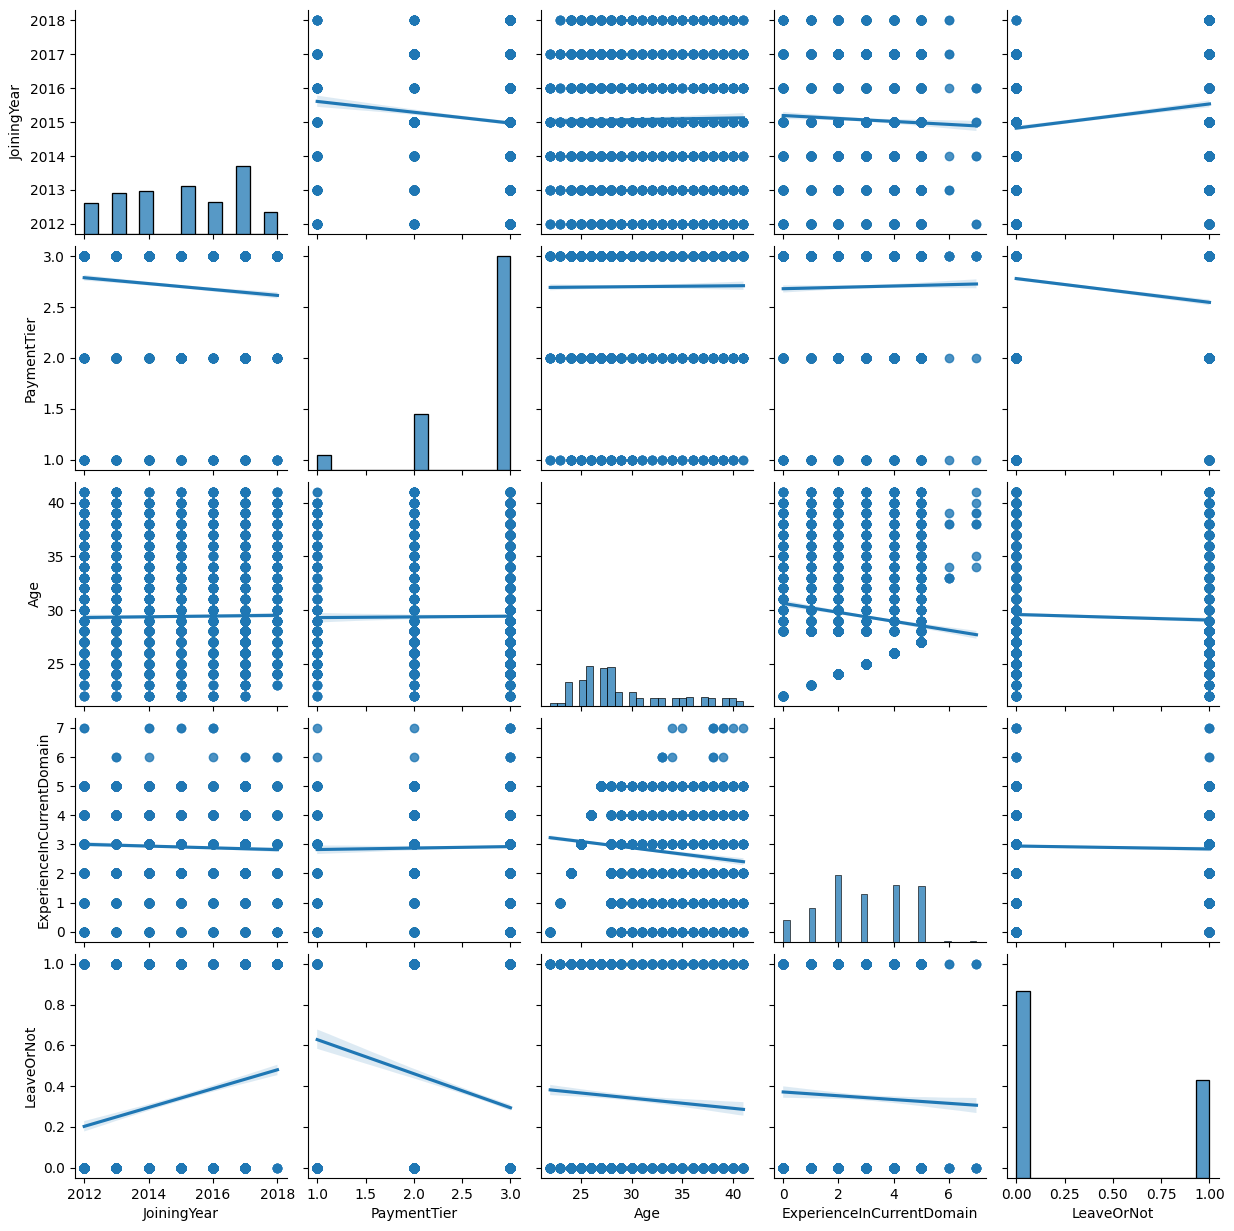

In [ ]:
sns.pairplot(data, kind='reg')
plt.show()

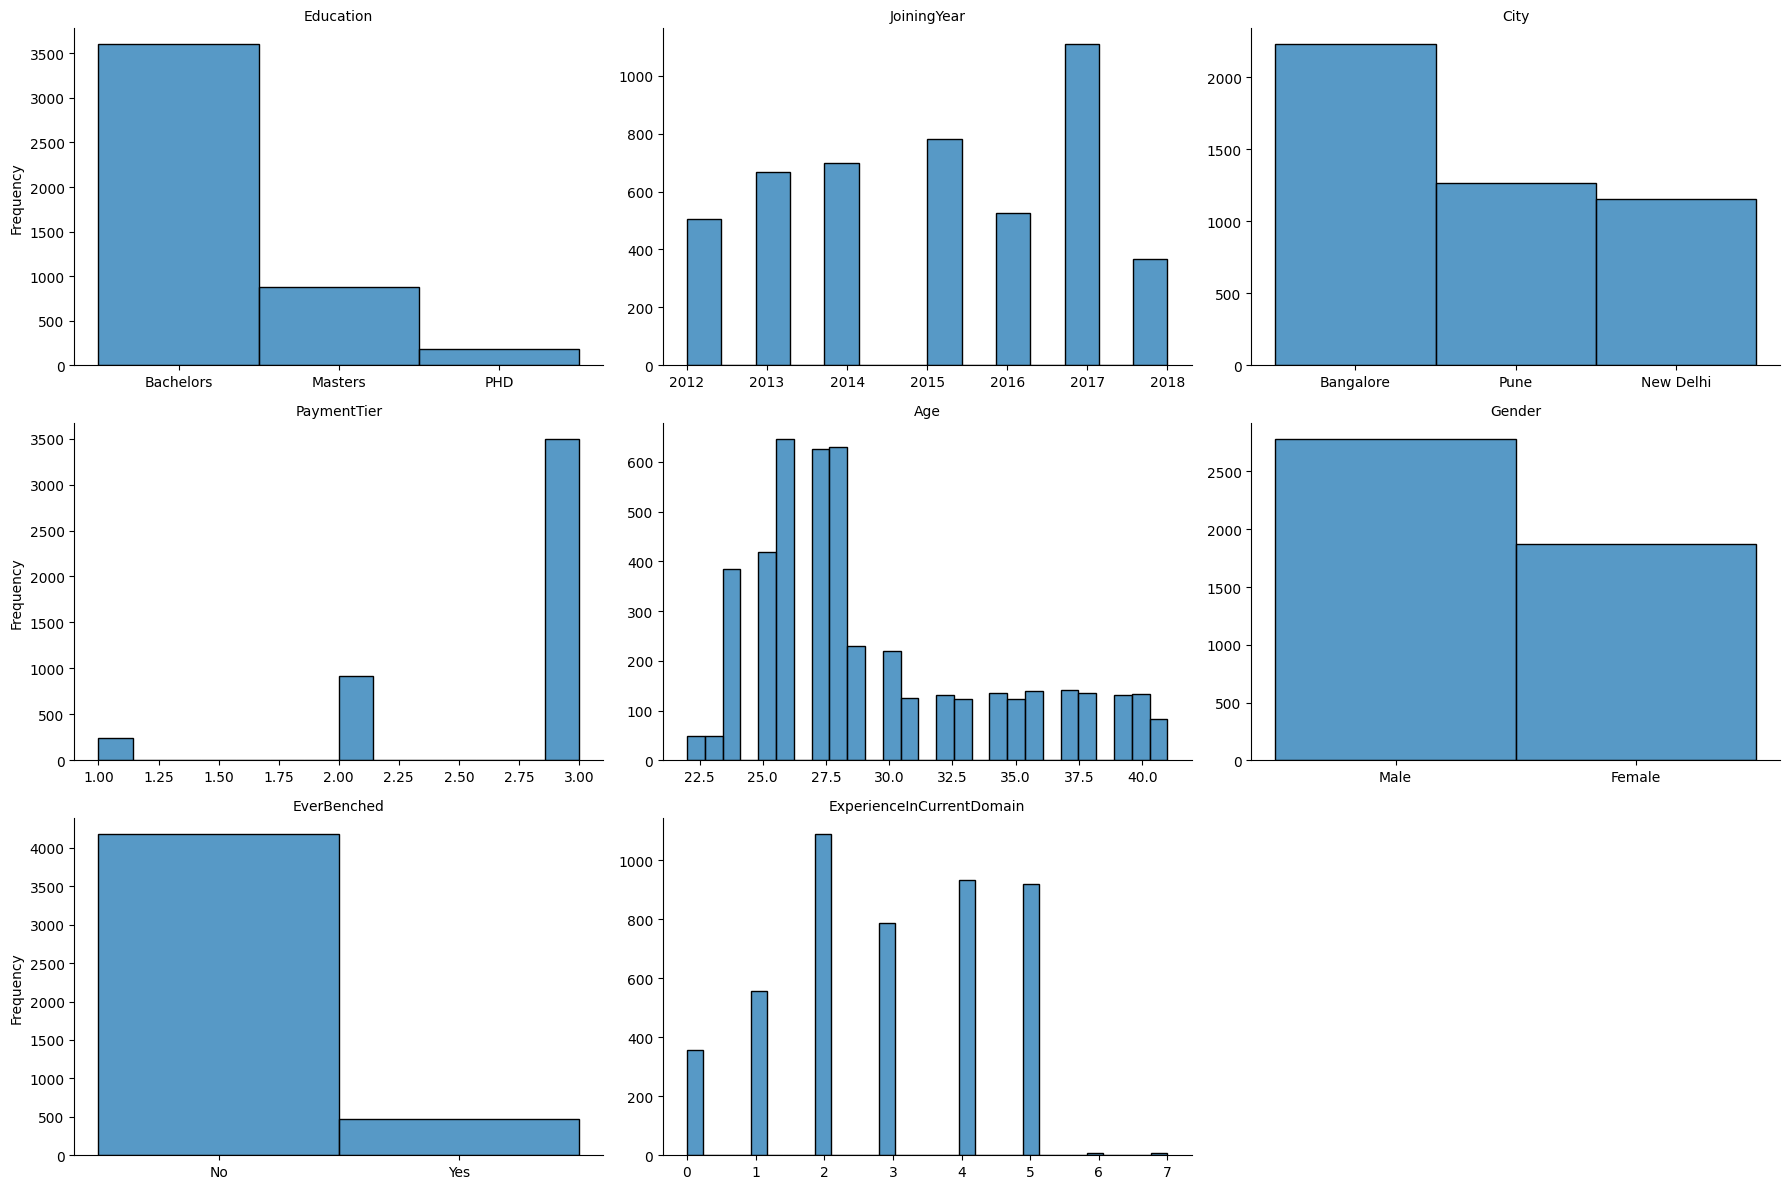

In [ ]:
# Chuyển đổi dữ liệu sang dạng "long-form" phù hợp với FacetGrid
data_facetgrid = data.drop(columns='LeaveOrNot').melt(var_name='Variable', value_name='Value')

# Khởi tạo FacetGrid
g = sns.FacetGrid(data_facetgrid, col='Variable', col_wrap=3, sharex=False, sharey=False, height=4, aspect=1.5)

# Áp dụng histogram cho từng subplot
g.map(sns.histplot, 'Value')

# Tùy chỉnh tiêu đề và nhãn
g.set_titles(col_template="{col_name}")
g.set_axis_labels("", "Frequency")

plt.tight_layout()
plt.show()

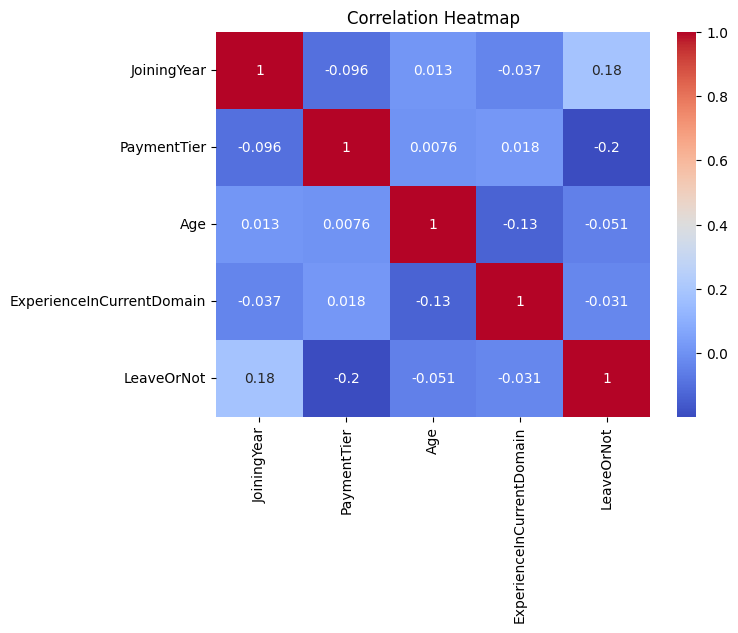

In [ ]:
plt.figure(figsize = (7, 5))

numerical_data = data.select_dtypes(include=np.number)

sns.heatmap(data=numerical_data.corr()
            , annot=True
            , cmap='coolwarm'
        )
plt.title("Correlation Heatmap")
plt.show()

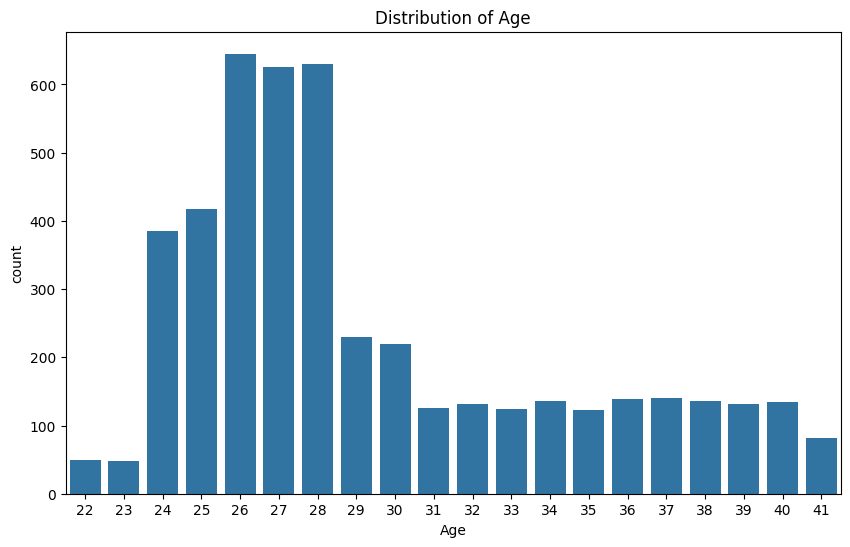

In [ ]:
# biểu đồ thể hiện phân phối của tuổi trong data
plt.figure(figsize = (10, 6))

sns.countplot(x='Age'
            , data=data
        )

plt.title("Distribution of Age")
plt.show()

| Age Range | Group Name   | Meaning                                        |
| --------- | ------------ | ---------------------------------------------- |
| 18–25     | Youth        | Sinh viên mới ra trường, bắt đầu sự nghiệp     |
| 26–35     | Young Adults | Trưởng thành, phát triển nghề nghiệp           |
| 36–50     | Middle Age   | Ổn định, nhiều kinh nghiệm, tiềm năng lãnh đạo |
| 51–65     | Older Adults | Dày dạn kinh nghiệm, có thể chuẩn bị nghỉ hưu  |


In [ ]:
age_bins = [18, 25, 35, 50, 65]
age_labels = [
    'Youth (18–25)',
    'Young Adults (26–35)',
    'Middle Age (36–50)',
    'Older Adults (51–65)'
]

data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)
data

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,AgeGroup
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0,Young Adults (26–35)
1,Bachelors,2013,Pune,1,28,Female,No,3,1,Young Adults (26–35)
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0,Middle Age (36–50)
3,Masters,2016,Bangalore,3,27,Male,No,5,1,Young Adults (26–35)
4,Masters,2017,Pune,3,24,Male,Yes,2,1,Youth (18–25)
...,...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0,Young Adults (26–35)
4649,Masters,2013,Pune,2,37,Male,No,2,1,Middle Age (36–50)
4650,Masters,2018,New Delhi,3,27,Male,No,5,1,Young Adults (26–35)
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0,Young Adults (26–35)


In [ ]:
# tính phần trăm AgeGroup theo LeaveOrNot
agegrp_leave_rate = data.groupby('AgeGroup')['LeaveOrNot'].mean().mul(100).round(1)
agegrp_leave_rate = agegrp_leave_rate.reset_index().rename(columns={'LeaveOrNot': 'AttritionRate'})
agegrp_leave_rate

/tmp/ipython-input-297-956678549.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agegrp_leave_rate = data.groupby('AgeGroup')['LeaveOrNot'].mean().mul(100).round(1)


,AgeGroup,AttritionRate
0,Youth (18–25),39.0
1,Young Adults (26–35),34.6
2,Middle Age (36–50),31.2
3,Older Adults (51–65),NaN


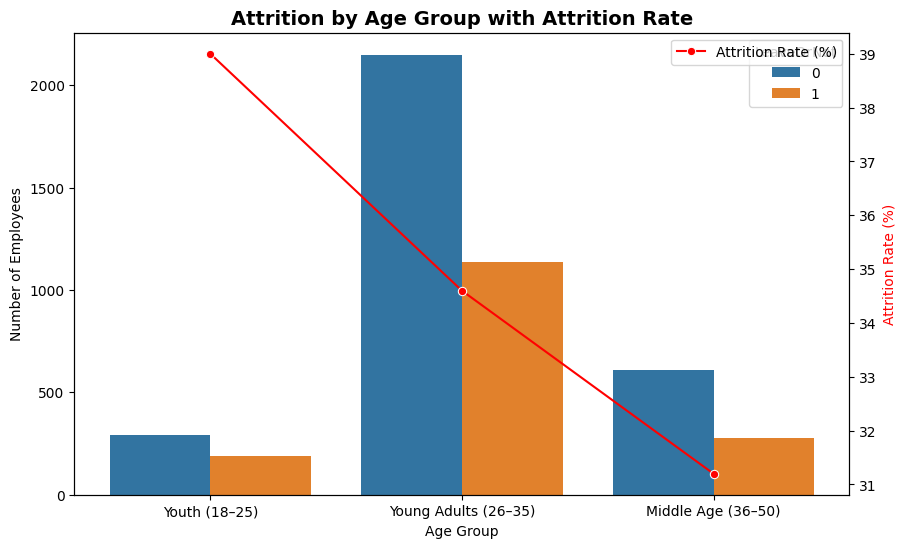

In [ ]:
# Khởi tạo figure và trục
fig, ax1 = plt.subplots(figsize = (10, 6))

# Biểu đồ cột
sns.countplot(x='AgeGroup', hue='LeaveOrNot', data=data, ax=ax1)
ax1.set_ylabel('Number of Employees')

# Biểu đồ đường trên trục phụ
ax2 = ax1.twinx()
line = sns.lineplot(x='AgeGroup', y='AttritionRate', data=agegrp_leave_rate, marker='o', color='red', label='Attrition Rate (%)', ax=ax2)
ax2.set_ylabel('Attrition Rate (%)', color='red')

# Tiêu đề và chỉnh legend
ax1.set_title('Attrition by Age Group with Attrition Rate', fontsize=14, fontweight='bold')
ax1.set_xlabel('Age Group')

plt.show()

Nhận xét:

    - Age Group có ảnh hưởng đến biến mục tiêu LeaveOrNot.
    - Nhóm 26–35 tuổi (Young Adults) là nhóm cần đặc biệt chú ý trong chiến lược giữ chân.
    - Nhóm trẻ (Youth) cũng có nguy cơ nghỉ cao dù quy mô nhỏ → nên hỗ trợ định hướng nghề nghiệp.

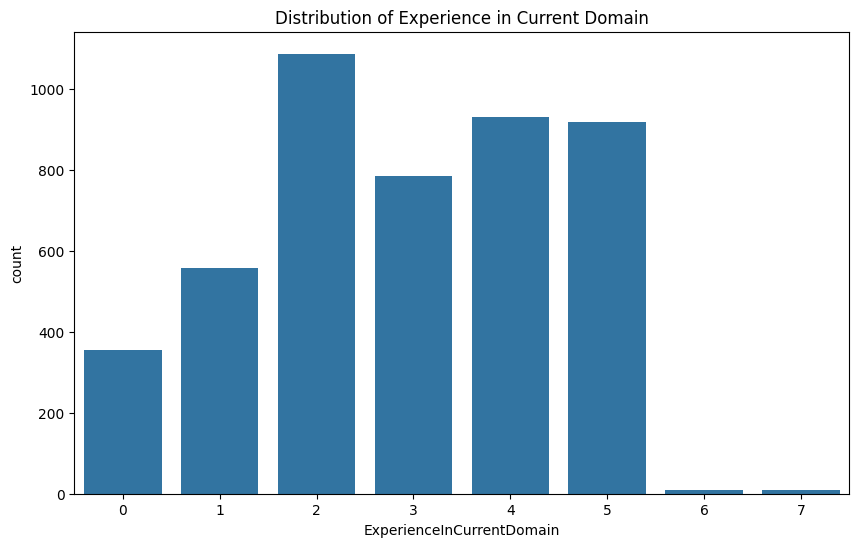

In [ ]:
# phân phối của biến ExperienceInCurrentDomain
plt.figure(figsize = (10, 6))

sns.countplot(x='ExperienceInCurrentDomain'
            , data=data
        )
plt.title("Distribution of Experience in Current Domain")
plt.show()

In [ ]:
# tính phần trăm của ExperienceInCurrentDomain theo LeaveOrNot
exp_leave_rate = data.groupby('ExperienceInCurrentDomain')['LeaveOrNot'].mean().mul(100).round(1)
exp_leave_rate = exp_leave_rate.reset_index().rename(columns={'LeaveOrNot': 'AttritionRate'})
exp_leave_rate

,ExperienceInCurrentDomain,AttritionRate
0,0,34.9
1,1,33.7
2,2,36.7
3,3,38.0
4,4,31.9
5,5,31.3
6,6,25.0
7,7,33.3


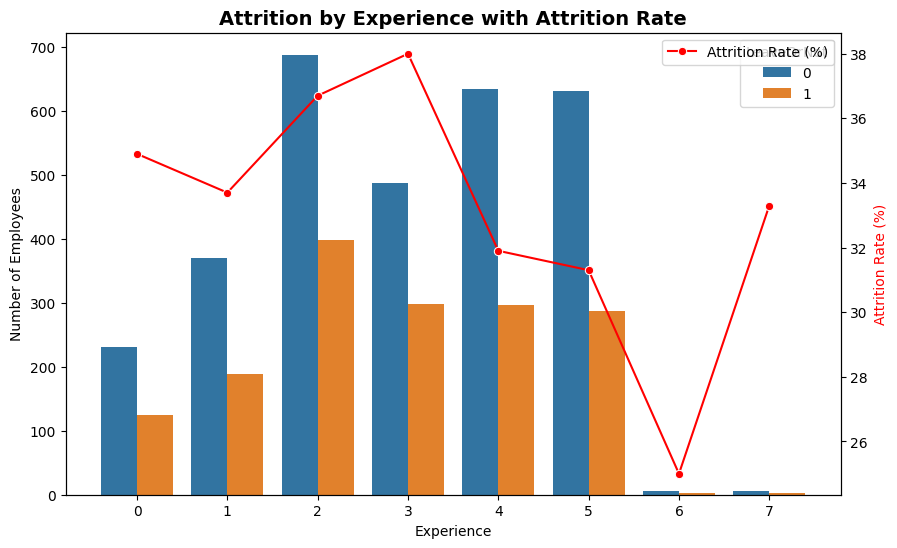

In [ ]:
fig, ax1 = plt.subplots(figsize = (10, 6))

sns.countplot(x='ExperienceInCurrentDomain', hue='LeaveOrNot', data=data, ax=ax1)
ax1.set_ylabel('Number of Employees')

ax2 = ax1.twinx()
line = sns.lineplot(x='ExperienceInCurrentDomain', y='AttritionRate', data=exp_leave_rate, marker='o', color='red', label='Attrition Rate (%)', ax=ax2)
ax2.set_ylabel('Attrition Rate (%)', color='red')

ax1.set_title('Attrition by Experience with Attrition Rate', fontsize=14, fontweight='bold')
ax1.set_xlabel('Experience')

plt.show()

Nhận xét:

    - Kinh nghiệm trong lĩnh vực hiện tại là yếu tố quan trọng ảnh hưởng đến quyết định nghỉ việc.
    - Nhân viên có từ 0–2 năm kinh nghiệm có rủi ro nghỉ việc cao nhất → cần:

        + Đào tạo tốt hơn trong giai đoạn đầu
        + Theo sát và cung cấp lộ trình phát triển rõ ràng



Text(0.5, 1.0, 'Attrition by Age Group and Experience')

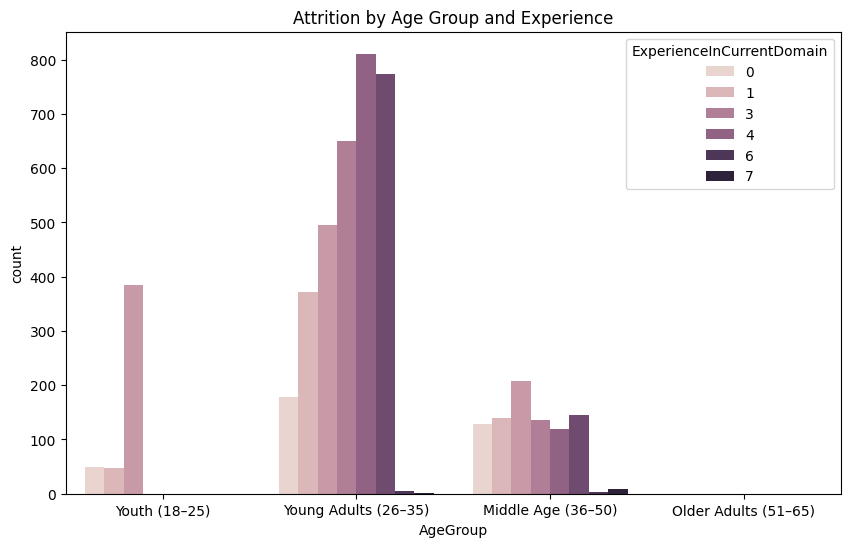

In [ ]:
# vẽ biểu đồ thể hiện mối liên hệ giữa Age Group và ExperienceInCurrentDomain
plt.figure(figsize = (10, 6))

sns.countplot(x='AgeGroup'
            , hue='ExperienceInCurrentDomain'
            , data=data
        )
plt.title("Attrition by Age Group and Experience")

In [ ]:
edu_leave_rate = data.groupby('Education')['LeaveOrNot'].mean().mul(100).round(1)
edu_leave_rate = edu_leave_rate.reset_index().rename(columns={'LeaveOrNot': 'AttritionRate'})
edu_leave_rate

,Education,AttritionRate
0,Bachelors,31.4
1,Masters,48.8
2,PHD,25.1


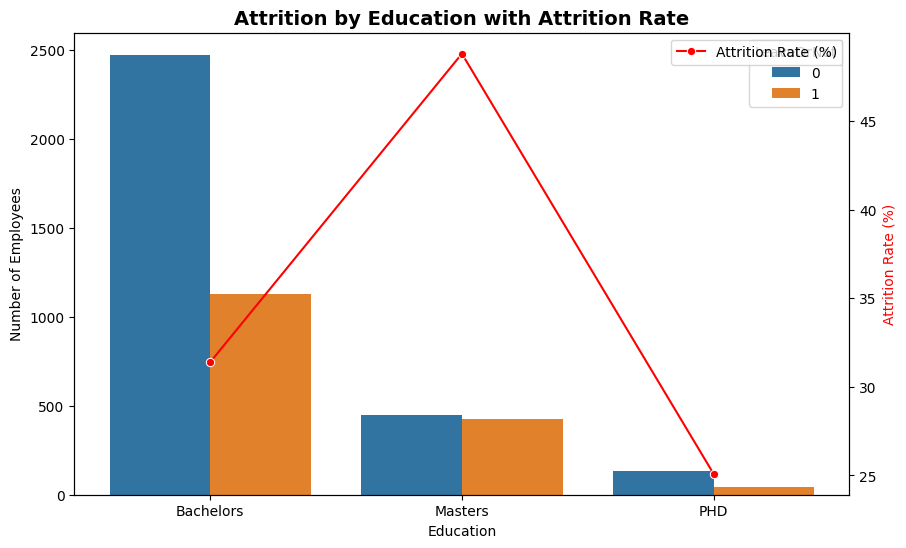

In [ ]:
fig, ax1 = plt.subplots(figsize = (10, 6))

sns.countplot(x='Education', hue='LeaveOrNot', data=data, ax=ax1)
ax1.set_ylabel('Number of Employees')

ax2 = ax1.twinx()
line = sns.lineplot(x='Education', y='AttritionRate', data=edu_leave_rate, marker='o', color='red', label='Attrition Rate (%)', ax=ax2)
ax2.set_ylabel('Attrition Rate (%)', color='red')

ax1.set_title('Attrition by Education with Attrition Rate', fontsize=14, fontweight='bold')
ax1.set_xlabel('Education')

plt.show()

Nhận xét:

    - Trình độ học vấn có ảnh hưởng đến khả năng nghỉ việc, nhưng mức độ ảnh hưởng không tuyến tính.
    - Nhóm Thạc sĩ có tỷ lệ nghỉ việc cao đáng chú ý, dù số lượng không lớn.
    - Nhóm Cử nhân cần được xem xét kỹ hơn về tỷ lệ nghỉ việc, tránh hiểu nhầm do hiệu ứng quy mô.



Text(0.5, 1.0, 'Attrition by Ever Benched')

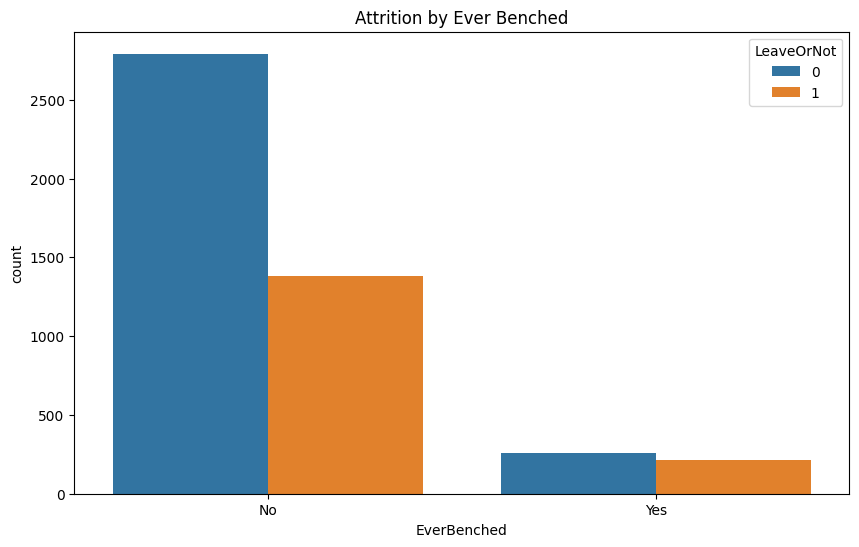

In [ ]:
# Ever Benched có ảnh hưởng thế nào đến LeaveOrnot?
plt.figure(figsize = (10, 6))

sns.countplot(x='EverBenched'
            , hue='LeaveOrNot'
            , data=data
        )
plt.title("Attrition by Ever Benched")

In [ ]:
df.groupby('EverBenched')['LeaveOrNot'].mean().sort_values(ascending=False).reset_index().rename(columns={'LeaveOrNot': 'AttritionRate'})

,EverBenched,AttritionRate
0,Yes,0.453975
1,No,0.331257


Text(0.5, 1.0, 'Attrition by Joining Year and City')

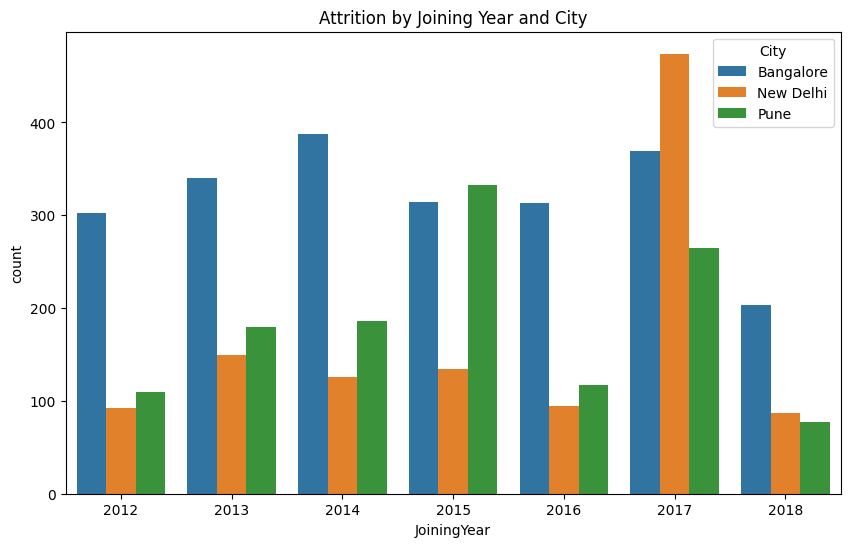

In [ ]:
# Thời gian JoiningYear khác nhau như thế nào ở các thành phố khác nhau?
plt.figure(figsize = (10, 6))

sns.countplot(x='JoiningYear'
            , hue='City'
            , data=data
        )
plt.title("Attrition by Joining Year and City")

Text(0.5, 1.0, 'Attrition by JoininingYear')

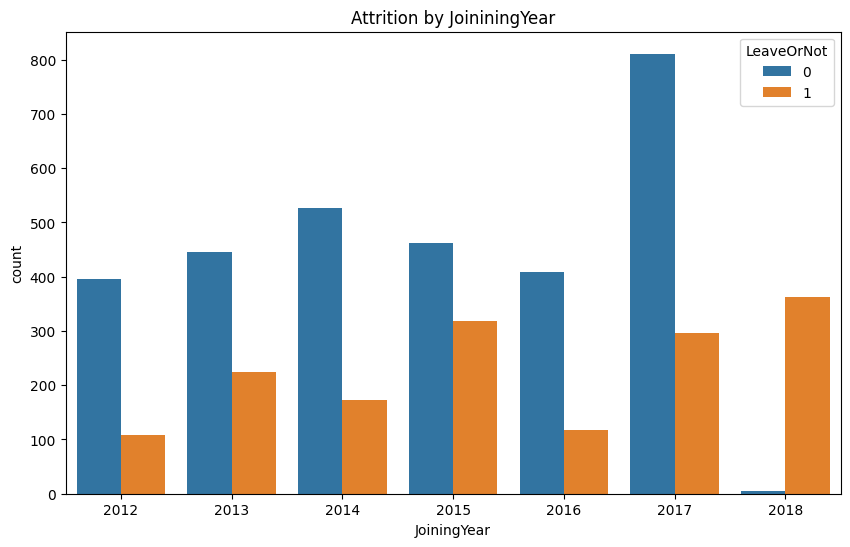

In [ ]:
# JoinningYear có ảnh hưởng như thế nào đến LeaveOrNot?
plt.figure(figsize = (10, 6))

sns.countplot(x='JoiningYear'
            , hue='LeaveOrNot'
            , data=data
        )
plt.title("Attrition by JoininingYear")

In [ ]:
df.groupby('JoiningYear')['LeaveOrNot'].mean().sort_values(ascending=False).reset_index().rename(columns={'LeaveOrNot': 'AttritionRate'})

,JoiningYear,AttritionRate
0,2018,0.986376
1,2015,0.407170
2,2013,0.334828
3,2017,0.268051
4,2014,0.247496
5,2016,0.222857
6,2012,0.216270


In [ ]:
#có bao nhiêu người gia nhập
df['JoiningYear'].value_counts().sort_index()

,count
JoiningYear,
2012,504
2013,669
2014,699
2015,781
2016,525
2017,1108
2018,367


In [ ]:
#có bao nhiêu người rời bỏ và ở lại năm 2018
df[df['JoiningYear'] == 2018]['LeaveOrNot'].value_counts()

,count
LeaveOrNot,
1,362
0,5


In [ ]:
df[df['JoiningYear'] == 2018]['LeaveOrNot'].value_counts(normalize=True)

,proportion
LeaveOrNot,
1,0.986376
0,0.013624


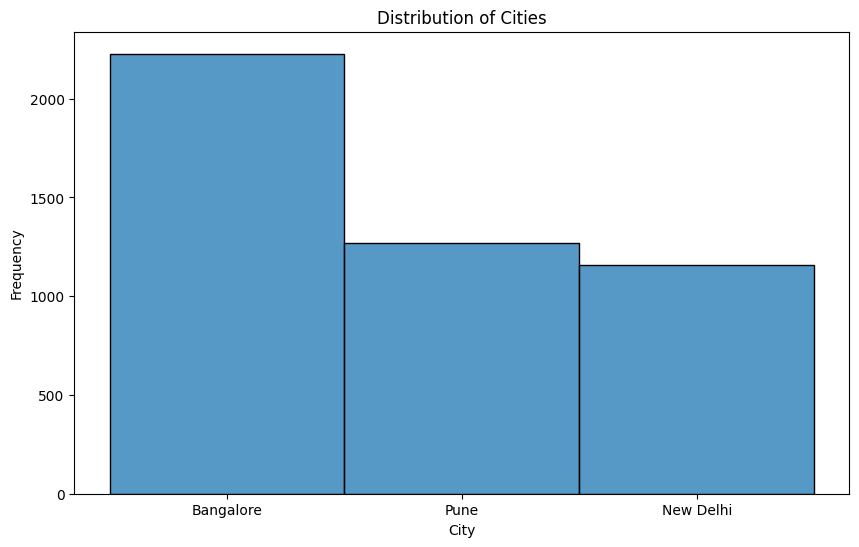

In [ ]:
# phân phối theo thành phố
plt.figure(figsize = (10, 6))

sns.histplot(x=data['City'])

plt.title("Distribution of Cities")
plt.xlabel("City")
plt.ylabel("Frequency")
plt.show()

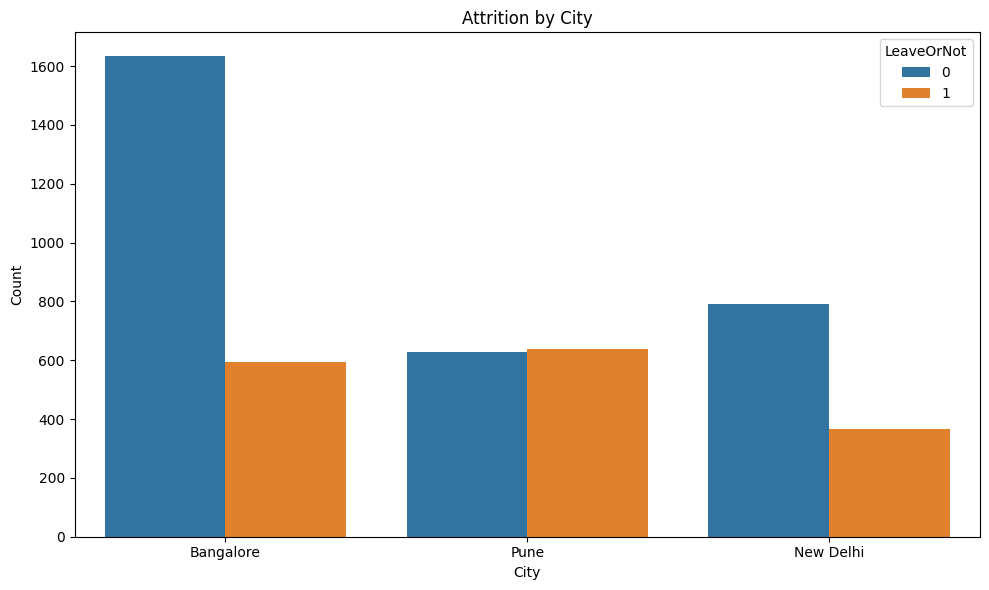

In [ ]:
# tỉ lệ nghỉ việc ở các city khác nhau như thế nào theo từng năm?
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='City', hue='LeaveOrNot', data=data)

plt.title("Attrition by City")
plt.xlabel("City")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
df.groupby('City')['LeaveOrNot'].mean().sort_values(ascending=False).reset_index().rename(columns={'LeaveOrNot': 'AttritionRate'})

,City,AttritionRate
0,Pune,0.503943
1,New Delhi,0.316335
2,Bangalore,0.267056


- Nhìn vào biểu đồ có thể thấy

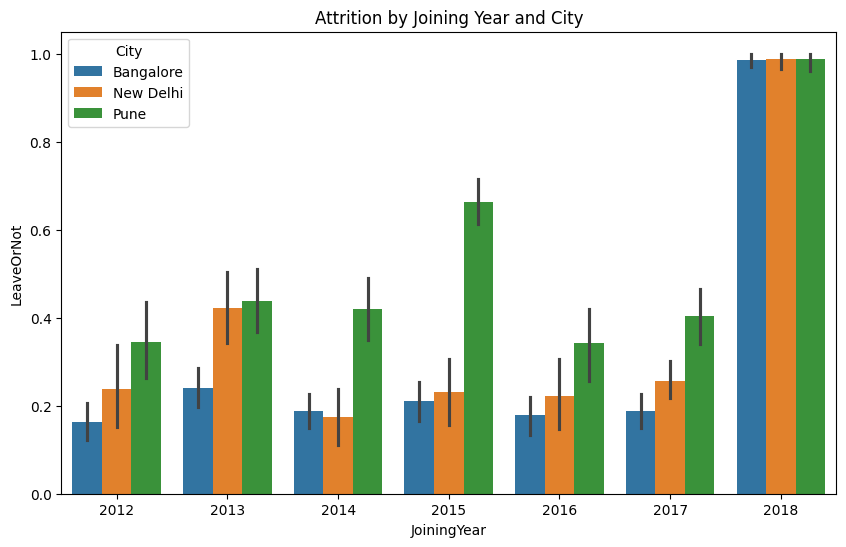

In [ ]:
# Thời gian JoiningYear theo khu vực và tỉ lệ nghỉ việc khác nhau
# như thế nào theo từng năm?
plt.figure(figsize = (10, 6))

sns.barplot(x='JoiningYear'
            , y='LeaveOrNot'
            , hue='City'
            , data=data
            )
plt.title("Attrition by Joining Year and City")
plt.show()

Nhận xét:

    - Biểu đồ cho thấy rõ xu hướng tuyển dụng theo thời gian và khu vực.
    - New Delhi cần được chú ý đặc biệt trong năm 2017 — vì nếu đi kèm với tỷ lệ nghỉ việc cao thì đây có thể là điểm “rủi ro”.
    - Bangalore có vai trò trung tâm, ổn định và tuyển dụng liên tục, trong khi Pune là điểm phụ trợ.

Text(0.5, 1.0, 'Attrition by Payment Tier and Experience')

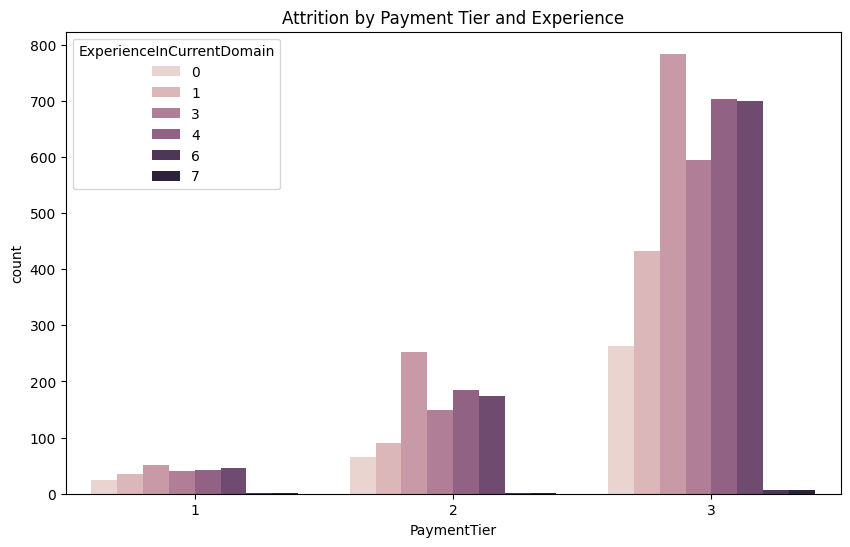

In [ ]:
# Có mối tương quan nào giữa Bậc thanh toán và Trải nghiệm trong lĩnh vực hiện tại không?
plt.figure(figsize = (10, 6))

sns.countplot(x='PaymentTier'
            , hue='ExperienceInCurrentDomain'
            , data=data
        )
plt.title("Attrition by Payment Tier and Experience")

Nhận xét:

    - Mối quan hệ giữa kinh nghiệm và bậc lương là rõ ràng và hợp lý: Càng nhiều kinh nghiệm → bậc lương càng cao.
    - Tuy nhiên, sự xuất hiện đáng kể của nhân viên ít kinh nghiệm (0–1 năm) ở bậc lương 3 có thể là ngoại lệ đáng chú ý → có thể do:
        + Chính sách đãi ngộ đặc biệt
        + Vị trí yêu cầu chuyên môn cao dù kinh nghiệm thấp
        + Dữ liệu chưa phản ánh đúng kinh nghiệm thực tế

In [ ]:
payment_leave_rate = data.groupby('PaymentTier')['LeaveOrNot'].mean().mul(100).round(1)
payment_leave_rate = payment_leave_rate.reset_index().rename(columns={'LeaveOrNot': 'AttritionRate'})
payment_leave_rate

,PaymentTier,AttritionRate
0,1,36.6
1,2,59.9
2,3,27.5


Text(0.5, 1.0, 'Attrition by Payment Tier')

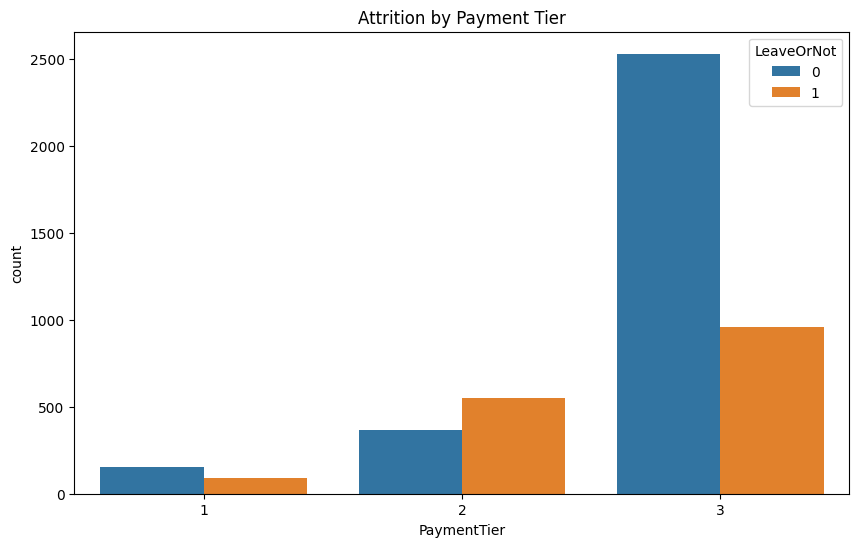

In [ ]:
# phân tích payment tier có tác động gì đeens leaveOrnot không ?
plt.figure(figsize = (10, 6))

sns.countplot(x='PaymentTier'
            , hue='LeaveOrNot'
            , data=data
        )
plt.title("Attrition by Payment Tier")

/tmp/ipython-input-195-1334648529.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender'


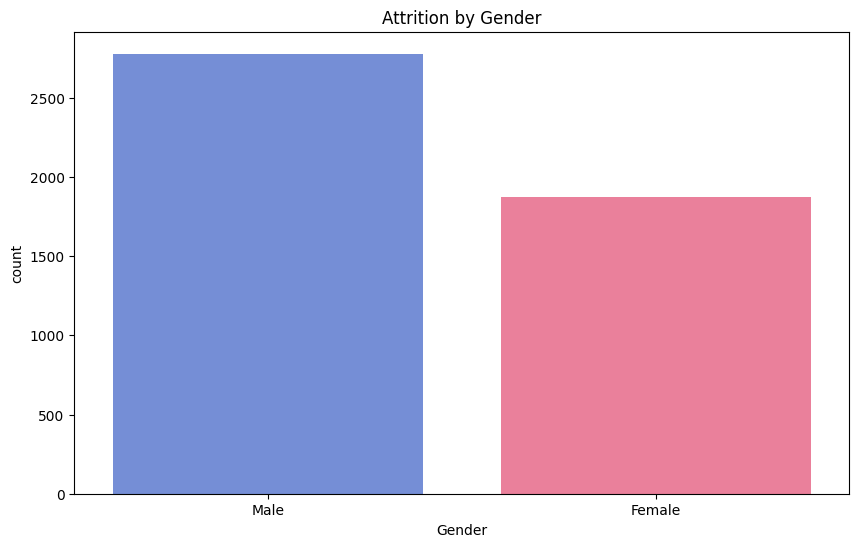

In [ ]:
plt.figure(figsize = (10, 6))

colors = ['#6586E6', '#fb6f92']

sns.countplot(x='Gender'
            , data=data
            , palette=colors
        )
plt.title("Attrition by Gender")
plt.show()

In [ ]:
gender_leave_rate = data.groupby('Gender')['LeaveOrNot'].mean().mul(100).round(1)
gender_leave_rate = gender_leave_rate.reset_index().rename(columns={'LeaveOrNot': 'AttritionRate'})
gender_leave_rate

,Gender,AttritionRate
0,Female,47.1
1,Male,25.8


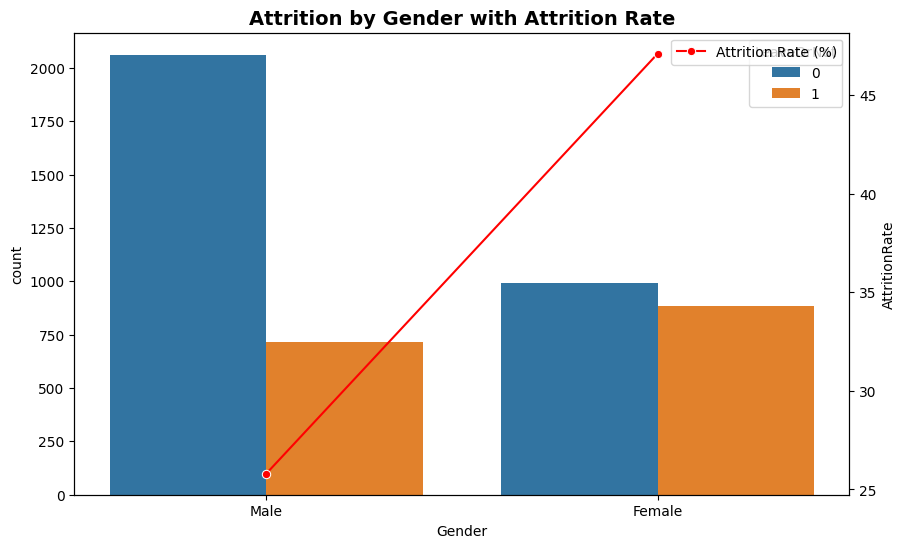

In [ ]:
fig, ax1 = plt.subplots(figsize = (10, 6))

sns.countplot(x='Gender', hue='LeaveOrNot', data=data, ax=ax1)

ax2 = ax1.twinx()
line = sns.lineplot(x='Gender', y='AttritionRate', data=gender_leave_rate, marker='o', color='red', label='Attrition Rate (%)', ax=ax2)

ax1.set_title('Attrition by Gender with Attrition Rate', fontsize=14, fontweight='bold')
ax1.set_xlabel('Gender')

plt.show()

- nhận xét:
- Tỷ lệ nữ rời đi nhiều hơn nam và tổng số nhân viên nữ trong công ty cũng ít hơn nam -> cần tạo chính sách giữ chân nhân viên nữ

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['EverBenched'] = data['EverBenched'].map({'Yes': 1, 'No': 0})
data

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,AgeGroup
0,Bachelors,2017,Bangalore,3,34,1,0,0,0,Young Adults (26–35)
1,Bachelors,2013,Pune,1,28,0,0,3,1,Young Adults (26–35)
2,Bachelors,2014,New Delhi,3,38,0,0,2,0,Middle Age (36–50)
3,Masters,2016,Bangalore,3,27,1,0,5,1,Young Adults (26–35)
4,Masters,2017,Pune,3,24,1,1,2,1,Youth (18–25)
...,...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,0,0,4,0,Young Adults (26–35)
4649,Masters,2013,Pune,2,37,1,0,2,1,Middle Age (36–50)
4650,Masters,2018,New Delhi,3,27,1,0,5,1,Young Adults (26–35)
4651,Bachelors,2012,Bangalore,3,30,1,1,2,0,Young Adults (26–35)


In [ ]:
# One-hot encode all categorical columns
data = pd.get_dummies(data, columns=['Education', 'City', 'AgeGroup', 'JoiningYear', 'PaymentTier'], drop_first=True)
data

,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Education_Masters,Education_PHD,City_New Delhi,City_Pune,AgeGroup_Young Adults (26–35),AgeGroup_Middle Age (36–50),AgeGroup_Older Adults (51–65),JoiningYear_2013,JoiningYear_2014,JoiningYear_2015,JoiningYear_2016,JoiningYear_2017,JoiningYear_2018,PaymentTier_2,PaymentTier_3
0,34,1,0,0,0,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True
1,28,0,0,3,1,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False
2,38,0,0,2,0,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True
3,27,1,0,5,1,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True
4,24,1,1,2,1,True,False,False,True,False,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4648,26,0,0,4,0,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True
4649,37,1,0,2,1,True,False,False,True,False,True,False,True,False,False,False,False,False,True,False
4650,27,1,0,5,1,True,False,True,False,True,False,False,False,False,False,False,False,True,False,True
4651,30,1,1,2,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Age                            4653 non-null   int64
 1   Gender                         4653 non-null   int64
 2   EverBenched                    4653 non-null   int64
 3   ExperienceInCurrentDomain      4653 non-null   int64
 4   LeaveOrNot                     4653 non-null   int64
 5   Education_Masters              4653 non-null   bool 
 6   Education_PHD                  4653 non-null   bool 
 7   City_New Delhi                 4653 non-null   bool 
 8   City_Pune                      4653 non-null   bool 
 9   AgeGroup_Young Adults (26–35)  4653 non-null   bool 
 10  AgeGroup_Middle Age (36–50)    4653 non-null   bool 
 11  AgeGroup_Older Adults (51–65)  4653 non-null   bool 
 12  JoiningYear_2013               4653 non-null   bool 
 13  JoiningYear_2014  

In [ ]:
data

,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Education_Masters,Education_PHD,City_New Delhi,City_Pune,AgeGroup_Young Adults (26–35),AgeGroup_Middle Age (36–50),AgeGroup_Older Adults (51–65),JoiningYear_2013,JoiningYear_2014,JoiningYear_2015,JoiningYear_2016,JoiningYear_2017,JoiningYear_2018,PaymentTier_2,PaymentTier_3
0,34,1,0,0,0,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True
1,28,0,0,3,1,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False
2,38,0,0,2,0,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True
3,27,1,0,5,1,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True
4,24,1,1,2,1,True,False,False,True,False,False,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4648,26,0,0,4,0,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True
4649,37,1,0,2,1,True,False,False,True,False,True,False,True,False,False,False,False,False,True,False
4650,27,1,0,5,1,True,False,True,False,True,False,False,False,False,False,False,False,True,False,True
4651,30,1,1,2,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True


## Xây dựng mô hình

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop(columns=['LeaveOrNot'])
y = data['LeaveOrNot']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### No-sampling

#### Randomforest

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf_model.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       611
           1       0.81      0.66      0.73       320

    accuracy                           0.83       931
   macro avg       0.82      0.79      0.80       931
weighted avg       0.83      0.83      0.82       931



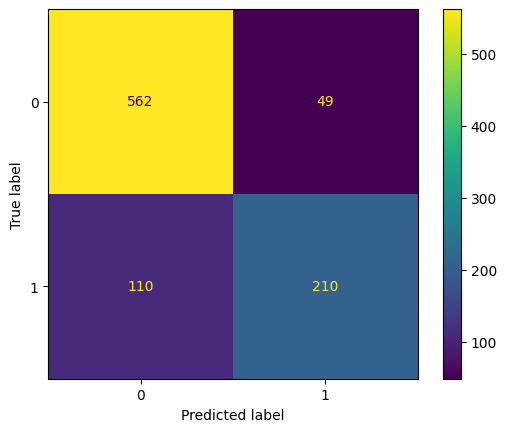

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred_rf))
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_rf)

/tmp/ipython-input-213-1283014756.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp[:10]


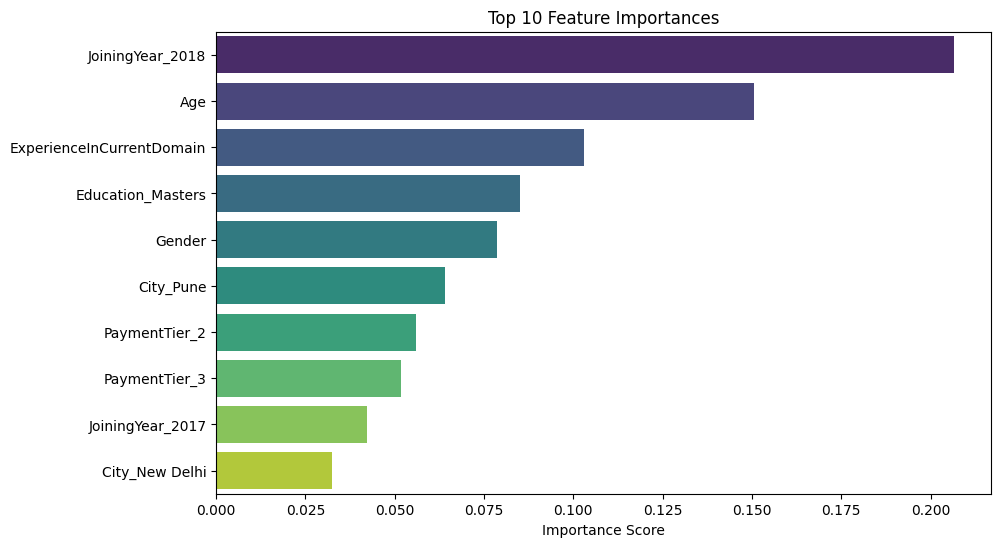

In [ ]:
importances = rf_model.feature_importances_
features = X_train.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp[:10]
            , y=feat_imp.index[:10].tolist()
            , palette='viridis'
        )
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.show()

#### LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred_lr = lr.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       611
           1       0.79      0.53      0.64       320

    accuracy                           0.79       931
   macro avg       0.79      0.73      0.75       931
weighted avg       0.79      0.79      0.78       931



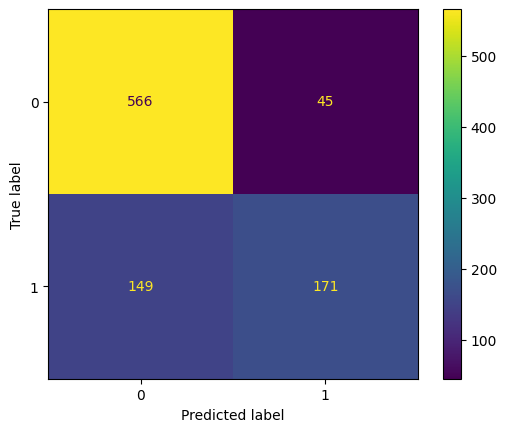

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred_lr))
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_lr)

#### XGBoosting

In [ ]:
import sklearn.metrics as metrics
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xgb = xgb.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       611
           1       0.85      0.65      0.74       320

    accuracy                           0.84       931
   macro avg       0.84      0.79      0.81       931
weighted avg       0.84      0.84      0.83       931



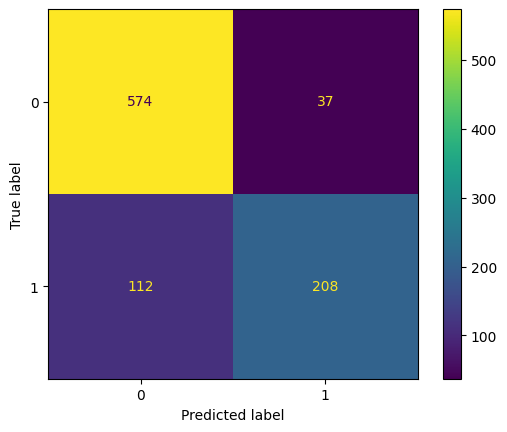

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred_xgb))
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_xgb)

####  LightGBM

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
lgbm = GradientBoostingClassifier()
lgbm.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred_lgbm = lgbm.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.84      0.96      0.89       611
           1       0.89      0.65      0.75       320

    accuracy                           0.85       931
   macro avg       0.86      0.80      0.82       931
weighted avg       0.86      0.85      0.84       931



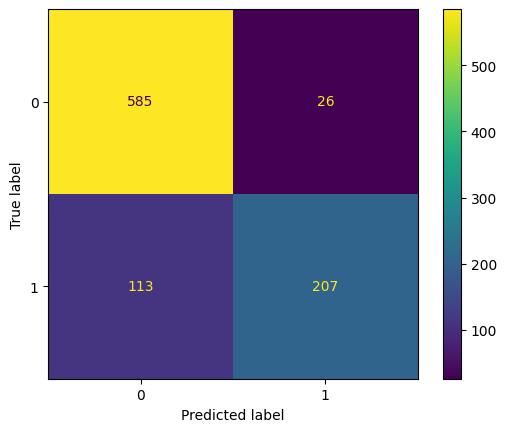

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred_lgbm))
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_lgbm)

#### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

GaussianNB()

In [ ]:
y_pred_nb = nb.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       611
           1       0.75      0.51      0.61       320

    accuracy                           0.77       931
   macro avg       0.77      0.71      0.72       931
weighted avg       0.77      0.77      0.76       931



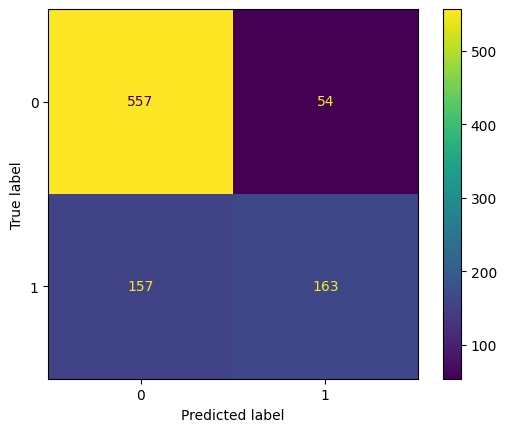

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred_nb))
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_nb)

#### SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC()
svm.fit(X_train_scaled, y_train)

SVC()

In [ ]:
y_pred_svm = svm.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       611
           1       0.89      0.62      0.73       320

    accuracy                           0.84       931
   macro avg       0.86      0.79      0.81       931
weighted avg       0.85      0.84      0.83       931



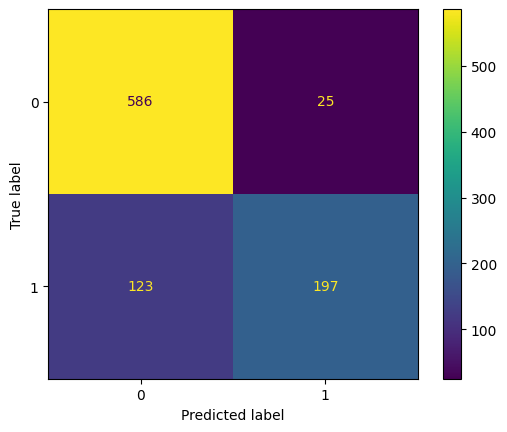

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred_svm))
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_svm)

### Over sampling

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train_scaled, y_train)

####

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       611
           1       0.78      0.68      0.72       320

    accuracy                           0.82       931
   macro avg       0.81      0.79      0.80       931
weighted avg       0.82      0.82      0.82       931



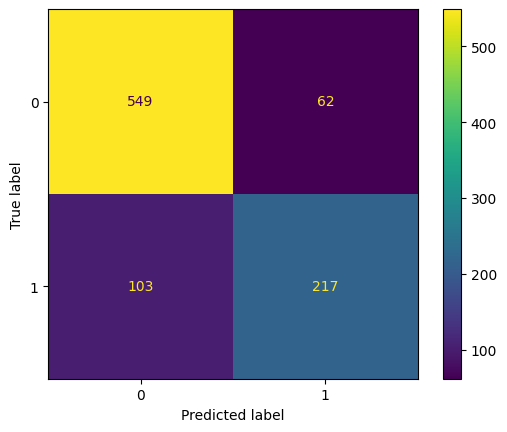

In [ ]:
# RandomForest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)

y_pred_rf = rf_model.predict(X_test_scaled)

print(classification_report(y_true=y_test, y_pred=y_pred_rf))
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_rf)

/tmp/ipython-input-235-260227941.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp[:10]


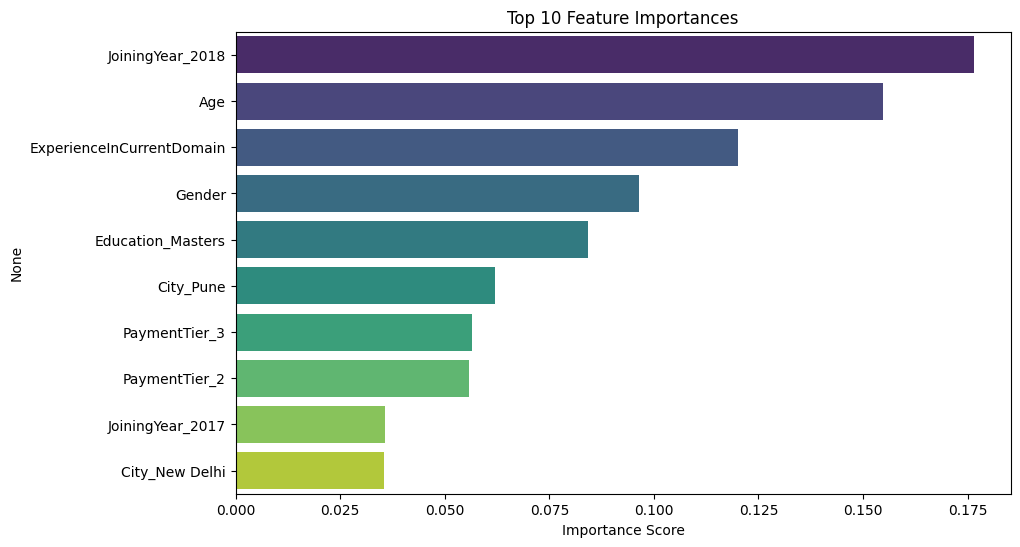

In [ ]:
importances = rf_model.feature_importances_
features = X_train.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp[:10]
            , y=feat_imp.index[:10]
            , palette='viridis'
        )
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.show()

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       611
           1       0.72      0.69      0.70       320

    accuracy                           0.80       931
   macro avg       0.78      0.77      0.78       931
weighted avg       0.80      0.80      0.80       931



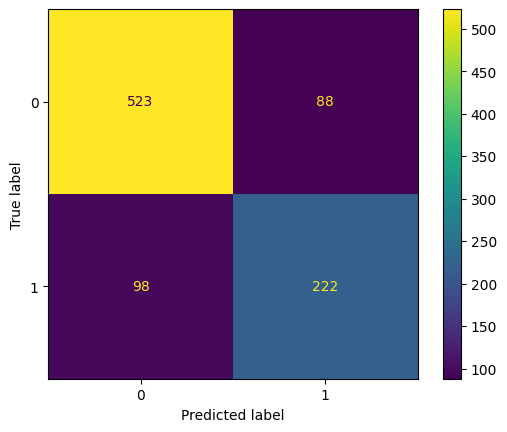

In [ ]:
# LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_resampled, y_resampled)

y_pred_lr = lr_model.predict(X_test_scaled)

print(classification_report(y_true=y_test, y_pred=y_pred_lr))
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_lr)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       611
           1       0.85      0.69      0.76       320

    accuracy                           0.85       931
   macro avg       0.85      0.81      0.83       931
weighted avg       0.85      0.85      0.85       931



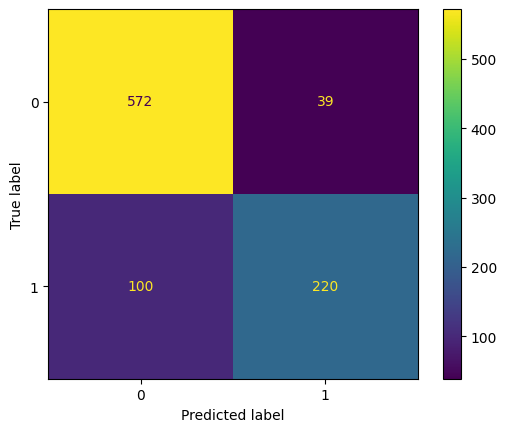

In [ ]:
# XGBoosting
xgb_model = XGBClassifier()
xgb_model.fit(X_resampled, y_resampled)

y_pred_xgb = xgb_model.predict(X_test_scaled)

print(classification_report(y_true=y_test, y_pred=y_pred_xgb))
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_xgb)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       611
           1       0.83      0.70      0.76       320

    accuracy                           0.85       931
   macro avg       0.84      0.81      0.83       931
weighted avg       0.85      0.85      0.85       931



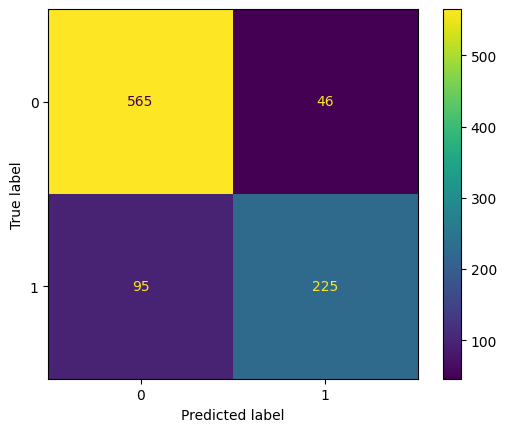

In [ ]:
# LightGBM
lgbm_model = GradientBoostingClassifier()
lgbm_model.fit(X_resampled, y_resampled)

y_pred_lgbm = lgbm_model.predict(X_test_scaled)

print(classification_report(y_true=y_test, y_pred=y_pred_lgbm))
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_lgbm)

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       611
           1       0.72      0.54      0.62       320

    accuracy                           0.77       931
   macro avg       0.75      0.71      0.73       931
weighted avg       0.76      0.77      0.76       931



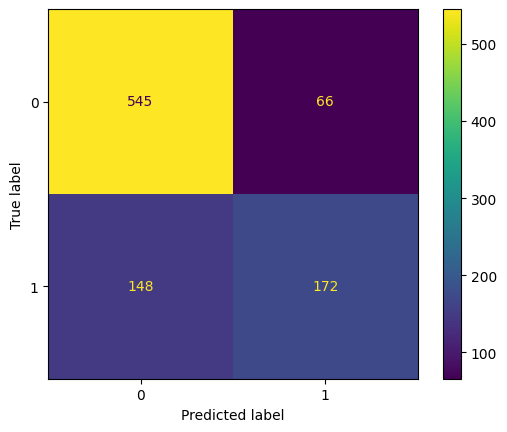

In [ ]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_resampled, y_resampled)

y_pred_nb = nb_model.predict(X_test_scaled)

print(classification_report(y_true=y_test, y_pred=y_pred_nb))
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_nb)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       611
           1       0.81      0.73      0.77       320

    accuracy                           0.85       931
   macro avg       0.84      0.82      0.83       931
weighted avg       0.85      0.85      0.85       931



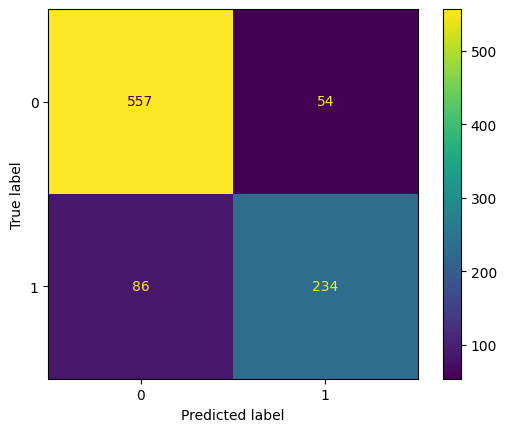

In [ ]:
# SVM
svm_model = SVC()
svm_model.fit(X_resampled, y_resampled)

y_pred_svm = svm_model.predict(X_test_scaled)

print(classification_report(y_true=y_test, y_pred=y_pred_svm))
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_svm)

### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

#### RandomForest

In [ ]:
rf_model = RandomForestClassifier(random_state=42)

rf_grid = GridSearchCV(
    estimator=rf_model
    , param_grid={
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10, 15],
    },
    scoring='recall'
)

rf_grid.fit(X_resampled, y_resampled)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'n_estimators': [100, 200, 300]},
             scoring='recall')

In [ ]:
pd.DataFrame(rf_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.514340,0.115366,0.028468,0.004587,None,100,"{'max_depth': None, 'n_estimators': 100}",0.717213,0.704918,0.779141,0.918200,0.899590,0.803813,0.089606,3
1,0.766423,0.006657,0.044474,0.000751,None,200,"{'max_depth': None, 'n_estimators': 200}",0.715164,0.704918,0.785276,0.920245,0.899590,0.805039,0.090227,1
2,1.246700,0.189594,0.070855,0.007709,None,300,"{'max_depth': None, 'n_estimators': 300}",0.713115,0.706967,0.787321,0.920245,0.897541,0.805038,0.089679,2
3,0.296915,0.063812,0.020201,0.005467,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.694672,0.688525,0.728016,0.738241,0.803279,0.730547,0.041008,12
4,0.442381,0.008484,0.024020,0.000456,5,200,"{'max_depth': 5, 'n_estimators': 200}",0.684426,0.690574,0.732106,0.756646,0.807377,0.734226,0.045263,10
5,0.659815,0.012749,0.037459,0.006761,5,300,"{'max_depth': 5, 'n_estimators': 300}",0.674180,0.690574,0.740286,0.762781,0.801230,0.733810,0.046587,11
6,0.287130,0.008965,0.018449,0.000442,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.694672,0.690574,0.775051,0.785276,0.838115,0.756738,0.056572,8
7,0.663297,0.118893,0.040750,0.006313,10,200,"{'max_depth': 10, 'n_estimators': 200}",0.694672,0.694672,0.775051,0.789366,0.834016,0.757556,0.054905,7
8,0.959753,0.188291,0.051623,0.005222,10,300,"{'max_depth': 10, 'n_estimators': 300}",0.694672,0.692623,0.775051,0.787321,0.825820,0.755097,0.052901,9
9,0.347192,0.006612,0.022461,0.000491,15,100,"{'max_depth': 15, 'n_estimators': 100}",0.704918,0.704918,0.775051,0.869121,0.858607,0.782523,0.071258,4


In [ ]:
y_pred = rf_grid.best_estimator_.predict(X_test_scaled)

In [ ]:
rf_grid.best_params_

{'max_depth': None, 'n_estimators': 200}

In [ ]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_resampled, y_resampled)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       611
           1       0.88      0.71      0.79       320

    accuracy                           0.87       931
   macro avg       0.87      0.83      0.84       931
weighted avg       0.87      0.87      0.86       931

RandomForest


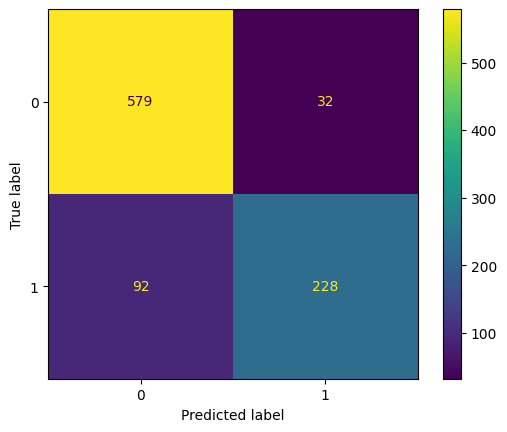

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred_rf))
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_rf)

/tmp/ipython-input-317-1932812641.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp[:10]


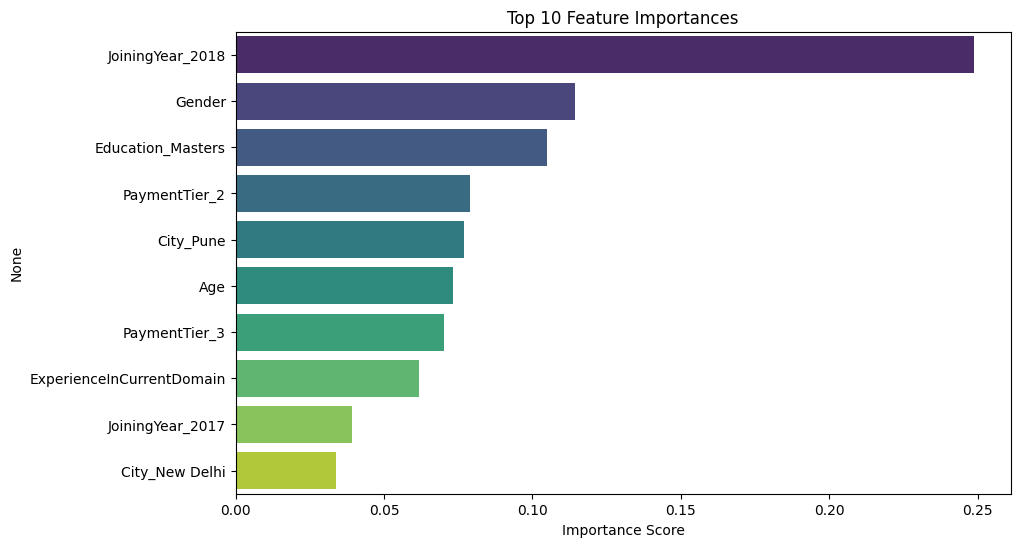

In [317]:
rf_importances = rf.feature_importances_
features = X_train.columns
feat_imp = pd.Series(rf_importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp[:10]
            , y=feat_imp.index[:10]
            , palette='viridis'
        )
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.show()

#### LogisticRegression

In [ ]:
lr_model = LogisticRegression()

lr_grid = GridSearchCV(
    estimator=lr_model
    , param_grid={
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga'],
    },
    scoring='recall'
)

lr_grid.fit(X_resampled, y_resampled)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='recall')

In [ ]:
y_pred_lr = lr_grid.best_estimator_.predict(X_test_scaled)

In [ ]:
lr_grid.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
lr_model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
lr_model.fit(X_resampled, y_resampled)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [ ]:
lr_pred = lr.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       611
           1       0.71      0.69      0.70       320

    accuracy                           0.80       931
   macro avg       0.78      0.77      0.77       931
weighted avg       0.80      0.80      0.80       931



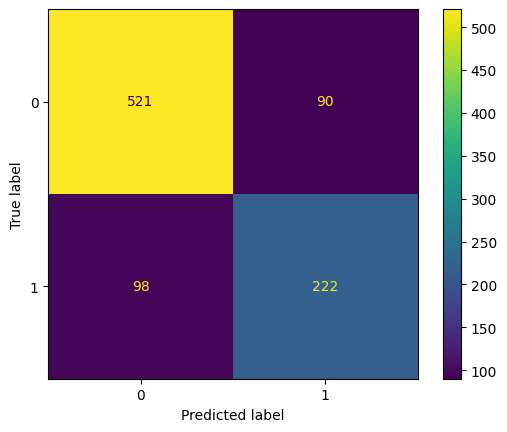

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred_lr))
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_lr)

#### XGBoosting

In [ ]:
xgb_model = XGBClassifier()
xgb_grid = GridSearchCV(
    estimator=xgb_model,
    param_grid={
        'tree_method': ['exact', 'approx'],
        'scale_pos_weight': [3, 4, 5, 6, 7]
    },
    scoring='recall'
)

xgb_grid.fit(X_resampled, y_resampled)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...ne,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'scale_pos_weight': [3, 4, 5, 6, 7],
                         'tree_method': ['exact', 'approx']},
             scoring='recall')

In [ ]:
y_pred_xgb = xgb_grid.best_estimator_.predict(X_test_scaled)

In [ ]:
xgb_grid.best_params_

{'scale_pos_weight': 7, 'tree_method': 'exact'}

In [ ]:
xgb_model = XGBClassifier(scale_pos_weight=7, tree_method='exact')
xgb_model.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

              precision    recall  f1-score   support

           0       0.90      0.64      0.75       611
           1       0.56      0.87      0.68       320

    accuracy                           0.72       931
   macro avg       0.73      0.75      0.71       931
weighted avg       0.78      0.72      0.72       931



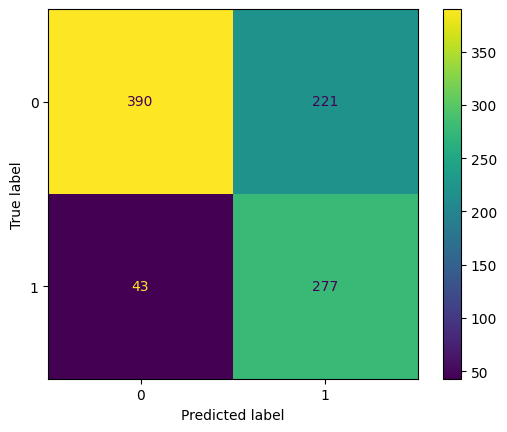

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred_xgb))
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_xgb)

In [330]:
# xem chỉ số của các importances bằng dạng bảng
xgb_importances = xgb_model.feature_importances_
features = X_train.columns
feat_imp = pd.Series(xgb_importances, index=features).sort_values(ascending=False)

feat_imp

,0
JoiningYear_2018,0.381074
PaymentTier_3,0.095837
City_Pune,0.076360
Education_Masters,0.075694
Gender,0.055696
PaymentTier_2,0.049030
JoiningYear_2017,0.044585
City_New Delhi,0.032148
ExperienceInCurrentDomain,0.029297
Education_PHD,0.027097


/tmp/ipython-input-318-2546174193.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp[:10]


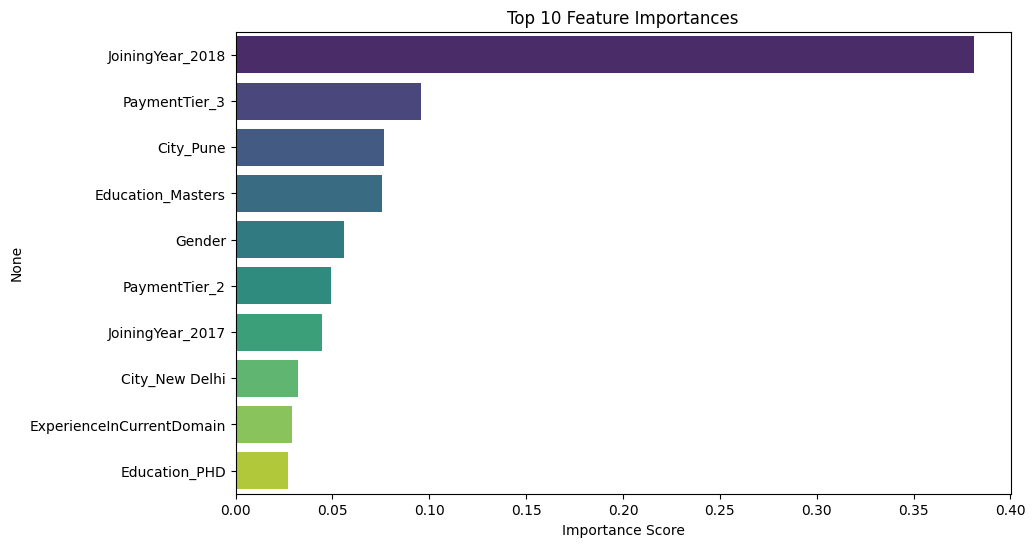

In [318]:
xgb_importances = xgb_model.feature_importances_
features = X_train.columns
feat_imp = pd.Series(xgb_importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp[:10]
            , y=feat_imp.index[:10]
            , palette='viridis'
        )
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.show()

#### LightGBM

In [ ]:
lgbm_model = GradientBoostingClassifier()

lgbm_grid = GridSearchCV(
    estimator=lgbm_model,
    param_grid={
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
    },
    scoring='recall'
)

lgbm_grid.fit(X_resampled, y_resampled)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [100, 200, 300]},
             scoring='recall')

In [ ]:
y_pred_lgbm = lgbm_grid.best_estimator_.predict(X_test_scaled)

In [ ]:
lgbm_grid.best_params_

{'learning_rate': 0.2, 'n_estimators': 300}

In [ ]:
lgbm_model = GradientBoostingClassifier(n_estimators=300, learning_rate=0.2)
lgbm_model.fit(X_resampled, y_resampled)

GradientBoostingClassifier(learning_rate=0.2, n_estimators=300)

In [ ]:
y_pred_lgbm = lgbm_model.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.85      0.95      0.89       611
           1       0.87      0.67      0.76       320

    accuracy                           0.85       931
   macro avg       0.86      0.81      0.83       931
weighted avg       0.86      0.85      0.85       931



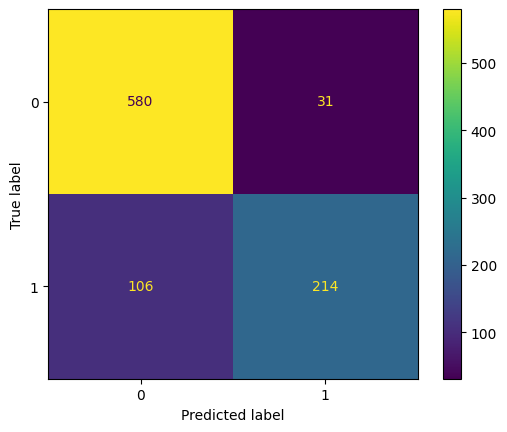

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred_lgbm))
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_lgbm)

/tmp/ipython-input-319-1401399107.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp[:10]


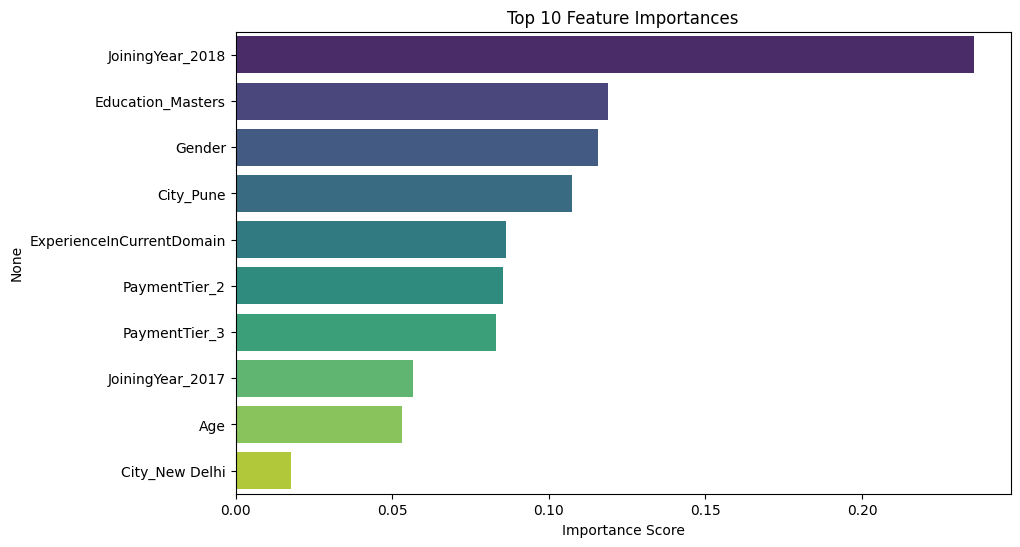

In [319]:
lgbm_importances = lgbm_model.feature_importances_
features = X_train.columns
feat_imp = pd.Series(lgbm_importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp[:10]
            , y=feat_imp.index[:10]
            , palette='viridis'
        )
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.show()

#### Naive Bayes

In [ ]:
nb_model = GaussianNB()

nb_grid = GridSearchCV(
    estimator=nb_model,
    param_grid={
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    },
    scoring='recall'
)

nb_grid.fit(X_resampled, y_resampled)

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             scoring='recall')

In [ ]:
y_pred_nb = nb_grid.best_estimator_.predict(X_test_scaled)

In [ ]:
nb_grid.best_params_

{'var_smoothing': 1e-05}

In [ ]:
nb_model = GaussianNB(var_smoothing=1e-05)
nb_model.fit(X_resampled, y_resampled)

GaussianNB(var_smoothing=1e-05)

In [ ]:
y_pred_nb = nb_model.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       611
           1       0.72      0.54      0.62       320

    accuracy                           0.77       931
   macro avg       0.75      0.71      0.73       931
weighted avg       0.76      0.77      0.76       931



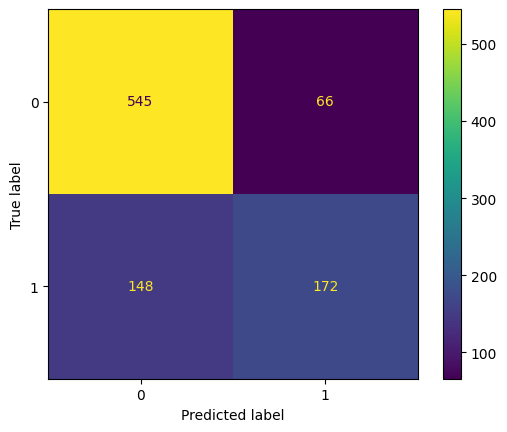

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred_nb))
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_nb)

#### SVM

In [ ]:
svm_model = SVC()

svm_grid = GridSearchCV(
    estimator=svm_model,
    param_grid={
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly']
    },
    scoring='recall'
)

svm_grid.fit(X_train_scaled, y_train)

In [ ]:
y_pred_svm = svm_grid.best_estimator_.predict(X_test_scaled)

In [ ]:
svm_grid.best_params_

In [ ]:
svm_model = SVC(C=100, kernel='rbf')
svm_model.fit(X_resampled, y_resampled)

In [ ]:
y_pred_svm = svm_model.predict(X_test_scaled)

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred_svm))
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_pred_svm)